# Algorithms and mathematics of machine learning
## Laboratory 7

### Task 1

The driver traveled from city A to city B at an average speed of 60 km/h. He drove faster back, with an average speed of 80 km/h. What was his average speed over the entire route?

> Note: do not use ready-made implementations.

> Hint: harmonic mean.

In [1]:
def harmonic_mean(data: list) -> float:
    return len(data) / sum([1 / value for value in data])


print(f'The average speed along the entire route is: {round(harmonic_mean([60, 80]), 2)} km/h')

The average speed along the entire route is: 68.57 km/h


### Task 2

Let's imagine a city with 700,000 inhabitants. There was a disease in the city and we know that one in 1,000 people got sick. We don't know exactly who these people are, but there is a test available that is 99% effective. Now we play the role of a patient who performed the test and the test result is positive. We want to find out how likely it is that we will get sick.

#### A)

Carry out a computer simulation:

- We generate a list of 700,000.
- We randomly select 700,000/1000 (because one in 1000 people got sick) people and mark them as sick.
- We randomly select 1% of sick and healthy people, and then mark their diagnosis as incorrect (because the test effectiveness is 99%).
- Calculate the probability that a person with a positive test result is actually sick (`number of sick people with a positive result` / `number of all people with a positive result`).

In [2]:
from numpy import array
from numpy.random import choice
from time import time


CITIZENS_QUANTITY = 700_000
SICK_RATE = 1 / 1_000

start = time()

citizens = array([False for _ in range(CITIZENS_QUANTITY)]) # False - healthy, True - sick
citizens[choice(CITIZENS_QUANTITY, int(CITIZENS_QUANTITY * SICK_RATE), replace=False)] = True

healthy = citizens[citizens == True]
sick = citizens[citizens == False]

healthy[choice(healthy.shape[0], int(healthy.shape[0] * 0.01), replace=False)] = False
sick[choice(sick.shape[0], int(sick.shape[0] * 0.01), replace=False)] = True

result = healthy.sum() / (healthy.sum() + sick.sum()) * 100
end_1 = time() - start
print(f'Time: {end_1}, result: {result}')

Time: 0.5961596965789795, result: 9.01639344262295


#### B)

Write a function that returns the result calculated using Bayes' formula. Measure and compare the computation time in task A and task B

In [3]:
def bayes_formula(chance: float, test_sensitivity: float) -> float:
    return test_sensitivity * chance / (test_sensitivity * chance + (1 - test_sensitivity) * (1 - chance))


start = time()
result = bayes_formula(chance=0.001, test_sensitivity=0.99) * 100
end_2 = time() - start

print(f'Time: {end_2}, result: {result}')

Time: 0.0, result: 9.016393442622944


In [4]:
print(f'Time difference between A) and B): {end_1 - end_2}')

Time difference between A) and B): 0.5961596965789795


#### C)

Display a graph where the X-axis is _test sensitivity_ and the Y-axis is _the probability that a person with a positive result has the disease_.

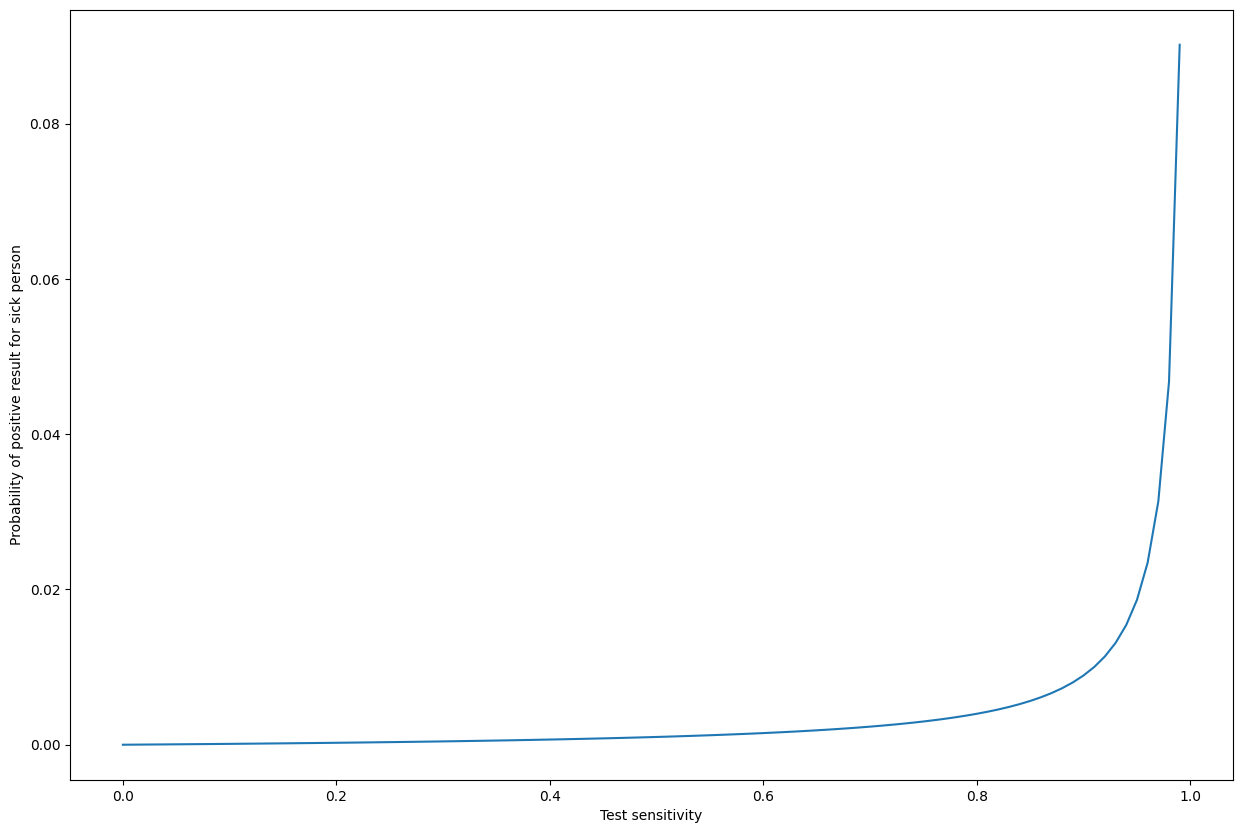

In [5]:
from matplotlib.pyplot import plot, xlabel, ylabel, show, figure
from numpy import arange


x = arange(0, 1, 0.01)

figure(figsize=(15, 10))
plot(x, bayes_formula(chance=0.001, test_sensitivity=x))
xlabel('Test sensitivity')
ylabel('Probability of positive result for sick person')
show()

### Task 3

Check (by simulation) how often you get a "hand" containing $\ge 8$ cards in one suit out of 13 cards. So we draw 13 cards out of 52 (so "hands" as in bridge) until we get $\ge 8$ cards in a certain suit. Conduct 1000 such tests and calculate the average. Additionally, write down one (e.g. the last) hand drawn.

In [6]:
# 0 1 2 3 colors of cards
from itertools import chain
from numpy import empty
from numpy.random import shuffle
from collections import Counter


ITER_COUNT = 1_000

cards = array(list(chain(*[[0, 1, 2, 3] for _ in range(13)])))
shuffle(cards)

score = 0
hand = empty((13,))
for i in range(ITER_COUNT):
    hand = choice(cards, 13, replace=False)
    counter = Counter(hand)

    if max(counter.values()) >= 8:
        score += 1

score /= ITER_COUNT

print(f'Last hand: {hand}')
print(f'Probability of getting 8 cards in same color is {score}%')

Last hand: [2 1 3 1 0 2 0 3 1 2 3 3 1]
Probability of getting 8 cards in same color is 0.003%
